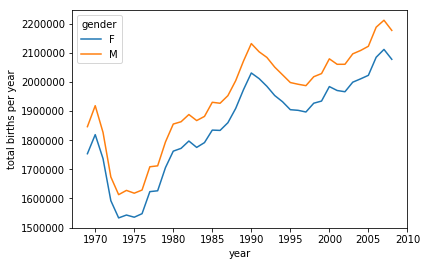

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
births = pd.read_csv('/home/ygq/文档/csv/births.csv')
births['decade'] = 10*(births['year']//10)
births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
plt.ylabel('total births per year');


In [2]:
births.hea()


AttributeError: 'DataFrame' object has no attribute 'hea'

In [3]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [5]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [6]:
data = ['pter','Paul',None,'MARRY','gUIDO']


In [7]:
names = pd.Series(data)

In [8]:
names.str.capitalize()

0     Pter
1     Paul
2     None
3    Marry
4    Guido
dtype: object

In [9]:
monte = pd.Series(['Grahm Chapman','John Cleese','Terry Gilliam','Eric Idle','Terry Jones','Michael Palin'])

In [10]:
monte.str.len()

0    13
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [11]:
monte.str.lower()

0    grahm chapman
1      john cleese
2    terry gilliam
3        eric idle
4      terry jones
5    michael palin
dtype: object

In [12]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [13]:
monte.str.split()

0    [Grahm, Chapman]
1      [John, Cleese]
2    [Terry, Gilliam]
3        [Eric, Idle]
4      [Terry, Jones]
5    [Michael, Palin]
dtype: object

In [14]:
monte.str.extract('([A-Za-z]+)')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0      Grahm
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [15]:
full_monte = pd.DataFrame({'name':monte,'info':['B|C|D','B|D','A|C','B|D','B|C','B|C|D']})

In [16]:
print(full_monte)

    info           name
0  B|C|D  Grahm Chapman
1    B|D    John Cleese
2    A|C  Terry Gilliam
3    B|D      Eric Idle
4    B|C    Terry Jones
5  B|C|D  Michael Palin


In [17]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [18]:
try:
    recipes = pd.read_json('/home/ygq/文档/json/recipeitems-latest.json')
except ValueError as e:
    print('ValueError:',e)

ValueError: Trailing data


In [19]:
with open('/home/ygq/文档/json/recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

(2, 12)

In [20]:
with open('/home/ygq/文档/json/recipeitems-latest.json','r') as f:
    data = (line.strip() for line in f)
    data_json = "[{0}]".format(','.join(data))
recipes = pd.read_json(data_json)

In [21]:
recipes.shape

(173278, 17)

In [22]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
cookTime                                                          PT30M
creator                                                             NaN
dateModified                                                        NaN
datePublished                                                2013-03-11
description           Late Saturday afternoon, after Marlboro Man ha...
image                 http://static.thepioneerwoman.com/cooking/file...
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
name                                    Drop Biscuits and Sausage Gravy
prepTime                                                          PT10M
recipeCategory                                                      NaN
recipeInstructions                                                  NaN
recipeYield                                                          12
source                                                  thepione

In [23]:
recipes.ingredients.str.len().describe()


count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [24]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

/home/ygq/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [25]:
"[{0}]".format(','.join({a:1,b:2}))

NameError: name 'a' is not defined

In [26]:
"[{0}]".format(','.join({'a':1,'b':2}))

'[b,a]'

In [27]:
a = {1:'a',2:'b'}
"[{0}]".format(','.join(a))

TypeError: sequence item 0: expected str instance, int found

In [28]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [29]:
recipes.ingredients.str.contains('[Cc]innamon').sum()


10526

In [30]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

11

In [31]:
spice_list = ['salt','pepper','oregano','sage','parsley','rosemary','tarragon','thyme','paprika','cumin']


In [32]:
import re
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                            for spice in spice_list))
spice_df.head()

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
0,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [33]:
selection = spice_df.query('parsley&paprika&tarragon')

In [34]:
selection.head()

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
2069,False,False,True,True,True,False,False,False,True,False
74964,False,False,True,True,False,False,False,False,True,False
93768,False,False,True,True,True,False,True,True,True,False
113926,False,False,True,True,True,False,False,True,True,False
137686,False,False,True,True,True,False,False,True,True,False


In [35]:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object